<a href="https://colab.research.google.com/github/nfierroflo/Evolutionary-computation/blob/main/PruebasFineles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
A=0.18
t0=33.941
gamma=18.975
beta=0.666
tfall=40.076
trise=13.416

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn import metrics

In [ ]:
import csv

#guardar
from csv import writer  #para guardar datos
def GuardarDatos(datasave,filename):
  with open(filename,'a') as file:
    writer_object=writer(file);
    writer_object.writerow(datasave);

In [ ]:
def str_to_value(value,text):
    text = text.replace("|_div_|", "/")
    text = text.replace("_exp_", "np.exp")
    text = text.replace("_sig_", "sigmoid")
    text = text.replace("x[0]", "t")
    t = value
    return eval(text)

In [ ]:
import sympy as sp
def simplify_expr(text):
    t = sp.Symbol('t')
    text = text.replace("|_div_|", "/")
    text = text.replace("_exp_", "exp")
    text = text.replace("_sig_", "sigmoide")
    text = text.replace("x[0]", "t")
    print(text)
    return sp.simplify(text)

## late

In [ ]:
late = lambda t:(A*(1-beta)*np.exp(-(t-(gamma+t0))/tfall)/(1+np.exp(-(t-t0)/trise)))

## early

In [ ]:
early = lambda t:(A*(1-beta*(t-t0)/gamma)/(1+np.exp(-(t-t0)/trise)))

## guardar Datos

In [ ]:
import math

def sigmoid(x):
  
    z = np.exp(-x)
    sig = 1 / (1 + z)

    return sig

In [ ]:
def plotResult(x,y,r1, r2, r3,title1=' '):
  plt.plot(x,y,'--',label='Train signal')
  plt.plot(t,r1,label='Run 0')
  plt.plot(t,r2,label='Run 1')
  plt.plot(t,r3,label='Run 2')
  plt.legend()
  plt.title('start:'+title1)
  plt.grid()

def plotFitness(epoch,f1, f2, f3,title1=''):
  plt.plot(epoch,f1,label='Run 0')
  plt.plot(epoch,f2,label='Run 1')
  plt.plot(epoch,f3,label='Run 2')
  plt.legend()
  plt.title('Fitness :'+title1)
  plt.grid()


In [ ]:
def LeerArchivo(base):
  misdatos=pd.read_csv(base,sep='\t',header=None);
  gene_=(misdatos.loc[:,0]).values.tolist();
  fit_=(misdatos.loc[:,1]).values.tolist();

  
  
  return gene_, fit_ 

In [ ]:
def LeerData(base):
  misdatos=pd.read_csv(base,sep=',',header=None);
  gene_=(misdatos.loc[:,0]).values.tolist();
  fit_=(misdatos.loc[:,1]).values.tolist();

  
  
  return gene_, fit_ 

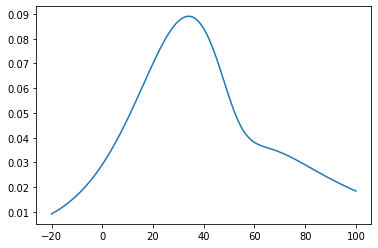

In [ ]:
import numpy as np
limitInner = [-20, 20]
n_train = 20
t1=np.linspace(*limitInner,n_train)

limitInner = [21, 80]
n_train = 60
t2=np.linspace(*limitInner,n_train)

limitInner = [81, 100]
n_train = 10
t3=np.linspace(*limitInner,n_train)
t=np.concatenate((t1,t2,t3))
ylate=fnc1(t)
yearly=fnc2(t)
aux=0.2*(t-(gamma+t0))
gt=sigmoid(aux)
Totalv3=yearly*(1-gt)+ylate*gt
plt.plot(t,Totalv3)

In [ ]:
np.sqrt(1/(2*10))

0.22360679774997896

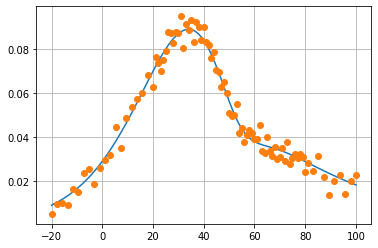

In [ ]:
nu1 = np.random.randn(len(Totalv3))
aux_=4.5
yt3=Totalv3+nu1*np.sqrt(1.0/(2*10**aux_))
plt.plot(t,Totalv3)
plt.plot(t,yt3,'o')
plt.grid()

In [ ]:
run1= ""
run2= ""
run3= ""
g1=lambda t: str_to_value(t,run1)
g2=lambda t: str_to_value(t,run2)
g3=lambda t: str_to_value(t,run3)

plt.plot(t,g1(t),'o',label='run 1')
plt.plot(t,g2(t),'o',label='run 2')
plt.plot(t,g3(t),'o',label='run 3')
plt.plot(t,Totalv3,'o',label='DATA')
plt.legend()
plt.grid()

SyntaxError: ignored

In [ ]:
def plotResults(t,y,r1, r2, r3, r4, r5, title=''):
  plt.plot(t,r1,'b',label='run 1',linewidth=1.5)
  plt.plot(t,r2,'c',label='run 2',linewidth=1.5)
  plt.plot(t,r3,'m',label='run 3',linewidth=1.5)
  plt.plot(t,r4,'y',label='run 4',linewidth=1.5)
  plt.plot(t,r5,'g',label='run 5',linewidth=1.5)

  plt.plot(t,y,'ok',label='DATA',linewidth=2.5)
  plt.legend()
  plt.ylabel('FLux')
  plt.xlabel('days')
  plt.title(title)
  plt.grid()


def CalcularRMS(t,y,r1, r2, r3, r4, r5):

  rmse_=np.zeros(5)

  rmse_[0]=metrics.mean_squared_error(y,r1, squared=False)
  rmse_[1]=metrics.mean_squared_error(y, r2, squared=False)
  rmse_[2]=metrics.mean_squared_error(y, r3, squared=False)
  rmse_[3]=metrics.mean_squared_error(y, r4, squared=False)
  rmse_[4]=metrics.mean_squared_error(y, r5, squared=False)

  return rmse_


def plotResultsGreen(t,y,r1, r2, r3, r4, r5, title=''):
  plt.plot(t,r1,'b',label='run 1',linewidth=1.5)
  plt.plot(t,r2,'c',label='run 2',linewidth=1.5)
  plt.plot(t,r3,'m',label='run 3',linewidth=1.5)
  plt.plot(t,r4,'y',label='run 4',linewidth=1.5)
  plt.plot(t,r5,'k',label='run 5',linewidth=1.5)

  plt.plot(t,y,'og',label='DATA',linewidth=2.5)
  plt.legend()
  plt.ylabel('FLux')
  plt.xlabel('days')
  plt.title(title)
  plt.grid()



def plotResultsRed(t,y,r1, r2, r3, r4, r5, title=''):
  plt.plot(t,r1,'b',label='run 1',linewidth=1.5)
  plt.plot(t,r2,'c',label='run 2',linewidth=1.5)
  plt.plot(t,r3,'m',label='run 3',linewidth=1.5)
  plt.plot(t,r4,'y',label='run 4',linewidth=1.5)
  plt.plot(t,r5,'k',label='run 5',linewidth=1.5)

  plt.plot(t,y,'or',label='DATA',linewidth=2.5)
  plt.legend()
  plt.ylabel('FLux')
  plt.xlabel('days')
  plt.title(title)
  plt.grid()



## Pruebas con SPM de tesiss

In [ ]:
base='TrainTotalv3.txt'
t,signal_ =LeerData(base)
t=np.array(t)

[0.00687232 0.00604599 0.00694992 0.00750437 0.00528874]
0.006532270799677236
0.0007769025177958182


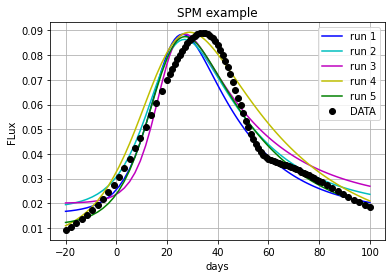

In [ ]:
#run1= "0.02+(((_sig_(0.22*(x[0]-25.63))))|_div_|(((_exp_((x[0]-75.73)|_div_|41.31)))*(x[0])))"
run1="0.016+(((_sig_(0.173*(x[0]-19.55))))|_div_|((58.62)*((_exp_((x[0]-67.10)|_div_|23.76)))))"
#run2= "0.018+(((_sig_(0.23*(x[0]-26.35))))|_div_|((x[0])*((_exp_((x[0]-66.62)|_div_|29.94)))))"
run2="0.018+((((_sig_(0.150*(x[0]-19.77))))|_div_|(70.93))|_div_|((_exp_((x[0]-75.85)|_div_|26.12))))"
run3= "0.02+(((_sig_(0.21*(x[0]-19.17))))|_div_|((87.58)*((_exp_((x[0]-85.09)|_div_|29.49)))))"
run4= "0.005+((((_sig_(0.11*(x[0]-18.92))))|_div_|(13.61))|_div_|((_exp_((x[0]-44.36)|_div_|36.36))))"
#run5= "0.015+(((_sig_(0.250*(x[0]-25.35))))|_div_|(((_exp_((x[0]-87.47)|_div_|50.19)))*(x[0])))"
run5= "0.011+(((_sig_(0.154*(x[0]-18.96))))|_div_|((80.09)*((_exp_((x[0]-87.83)|_div_|29.42)))))"

g1=lambda t: str_to_value(t,run1)
g2=lambda t: str_to_value(t,run2)
g3=lambda t: str_to_value(t,run3)
g4=lambda t: str_to_value(t,run4)
g5=lambda t: str_to_value(t,run5)

plotResults(t,signal_,g1(t), g2(t), g3(t), g4(t), g5(t), title="SPM example")


rmse_=CalcularRMS(t, signal_,g1(t), g2(t), g3(t), g4(t), g5(t))
print(rmse_)
print(np.mean(rmse_))
print(np.std(rmse_))

[0.00338796 0.00315577 0.00253867 0.00529736 0.0078153 ]
0.00443901451743496
0.0019234767865025043


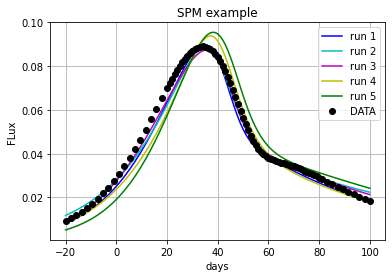

In [ ]:

run2="(0.309*(1-0.117*(x[0]-46.1)|_div_|10.62)|_div_|(1+_exp_((21.2-x[0])|_div_|13.12)))*(1-_sig_(0.2*(x[0]-(20.66+32.6))))+(_sig_(0.2*(x[0]-(04.61+23.3))))*(0.518*(1-0.922)*_exp_((31.44+56.4-x[0])|_div_|48.85)|_div_|(1+_exp_((41.9-x[0])|_div_|71.58)))"
#run3= "(0.559*(1-0.151*(x[0]-58.5)|_div_|33.84)|_div_|(1+_exp_((26.3-x[0])|_div_|15.16)))*(1-_sig_(0.2*(x[0]-(17.15+30.9))))+(_sig_(0.2*(x[0]-(01.10+20.2))))*(0.703*(1-0.896)*_exp_((04.02+31.5-x[0])|_div_|54.15)|_div_|(1+_exp_((27.2-x[0])|_div_|24.20)))"
run4= "(0.194*(1-0.670*(x[0]-49.6)|_div_|68.69)|_div_|(1+_exp_((39.8-x[0])|_div_|16.49)))*(1-_sig_(0.2*(x[0]-(16.75+25.3))))+(_sig_(0.2*(x[0]-(19.32+20.0))))*(0.088*(1-0.498)*_exp_((52.89+23.8-x[0])|_div_|45.90)|_div_|(1+_exp_((31.8-x[0])|_div_|91.33)))"
run3= "(0.135*(1-0.019*(x[0]-45.6)|_div_|41.87)|_div_|(1+_exp_((21.7-x[0])|_div_|15.65)))*(1-_sig_(0.2*(x[0]-(02.01+44.0))))+(_sig_(0.2*(x[0]-(16.83+35.2))))*(0.097*(1-0.092)*_exp_((06.00+40.2-x[0])|_div_|52.45)|_div_|(1+_exp_((28.6-x[0])|_div_|97.85)))"

run5= "(0.179*(1-0.255*(x[0]-24.9)|_div_|77.61)|_div_|(1+_exp_((30.7-x[0])|_div_|13.86)))*(1-_sig_(0.2*(x[0]-(08.19+38.2))))+(_sig_(0.2*(x[0]-(13.81+34.6))))*(0.127*(1-0.641)*_exp_((38.96+32.0-x[0])|_div_|57.40)|_div_|(1+_exp_((33.4-x[0])|_div_|33.42)))"
run1="(0.178*(1-0.035*(x[0]-48.0)|_div_|85.46)|_div_|(1+_exp_((29.7-x[0])|_div_|16.22)))*(1-_sig_(0.2*(x[0]-(22.31+21.4))))+(_sig_(0.2*(x[0]-(16.27+32.7))))*(0.141*(1-0.587)*_exp_((04.11+35.9-x[0])|_div_|51.67)|_div_|(1+_exp_((39.1-x[0])|_div_|08.66)))"
run2="(0.335*(1-0.048*(x[0]-57.8)|_div_|47.12)|_div_|(1+_exp_((52.3-x[0])|_div_|21.31)))*(1-_sig_(0.2*(x[0]-(12.07+29.8))))+(_sig_(0.2*(x[0]-(15.42+30.5))))*(0.348*(1-0.883)*_exp_((68.98+22.4-x[0])|_div_|58.89)|_div_|(1+_exp_((50.7-x[0])|_div_|88.04)))"

g1=lambda t: str_to_value(t,run1)
g2=lambda t: str_to_value(t,run2)
g3=lambda t: str_to_value(t,run3)
g4=lambda t: str_to_value(t,run4)
g5=lambda t: str_to_value(t,run5)

#g0=lambda x: (0.952*(1-0.649*(x-40.4)/01.29)/(1+np.exp((31.4-x)/17.43)))*(1-sigmoid(0.2*(x-(07.01+40.4))))+(sigmoid(0.2*(x-(02.26+26.3))))*(0.807*(1-0.117)*np.exp((87.29+47.7-x)/29.68)/(1+np.exp((40.6-x)/97.93)))
#g1=lambda x: (0.297*(1-0.638*(x-55.3)/01.03)/(1+np.exp((29.8-x)/33.53)))*(1-sigmoid(0.2*(x-(25.88+28.9))))+(sigmoid(0.2*(x-(00.87+22.1))))*(0.654*(1-0.266)*np.exp((89.14+51.0-x)/29.54)/(1+np.exp((43.7-x)/42.08)))
#g2=lambda x: (0.923*(1-0.804*(x-58.5)/02.13)/(1+np.exp((32.2-x)/19.08)))*(1-sigmoid(0.2*(x-(02.35+20.4))))+(sigmoid(0.2*(x-(00.90+25.3))))*(0.715*(1-0.072)*np.exp((93.42+30.1-x)/26.78)/(1+np.exp((29.1-x)/49.75)))


plotResults(t,signal_,g1(t), g2(t), g3(t), g4(t), g5(t), title="SPM example")


rmse_1=CalcularRMS(t, signal_,g1(t), g2(t), g3(t), g4(t), g5(t))
print(rmse_1)
print(np.mean(rmse_1))
print(np.std(rmse_1))


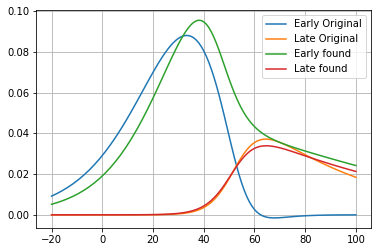

In [ ]:
run3= "(0.135*(1-0.019*(x[0]-45.6)|_div_|41.87)|_div_|(1+_exp_((21.7-x[0])|_div_|15.65)))*(1-_sig_(0.2*(x[0]-(02.01+44.0))))"
run4="(_sig_(0.2*(x[0]-(16.83+35.2))))*(0.097*(1-0.092)*_exp_((06.00+40.2-x[0])|_div_|52.45)|_div_|(1+_exp_((28.6-x[0])|_div_|97.85)))"

aux=0.2*(t-(gamma+t0))
gt=sigmoid(aux)
g0e= lambda t: early(t) 
g0l= lambda t: late(t) 
g4=lambda t: str_to_value(t,run4)
g5=lambda t: str_to_value(t,run5)

plt.plot(t, g0e(t)*(1-gt), label='Early Original')

plt.plot(t, g0l(t)*gt, label='Late Original')

plt.plot(t, g5(t), label='Early found')

plt.plot(t, g4(t), label='Late found')
plt.legend()
plt.grid()

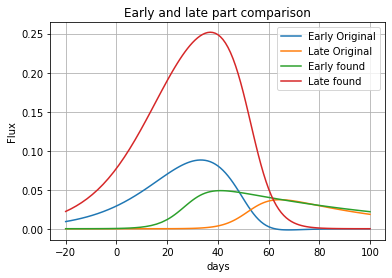

In [ ]:
run4="(0.309*(1-0.117*(x[0]-46.1)|_div_|10.62)|_div_|(1+_exp_((21.2-x[0])|_div_|13.12)))*(1-_sig_(0.2*(x[0]-(20.66+32.6))))"
run5="(_sig_(0.2*(x[0]-(04.61+23.3))))*(0.518*(1-0.922)*_exp_((31.44+56.4-x[0])|_div_|48.85)|_div_|(1+_exp_((41.9-x[0])|_div_|71.58)))"

aux=0.2*(t-(gamma+t0))
gt=sigmoid(aux)
g0e= lambda t: early(t) 
g0l= lambda t: late(t) 
g4=lambda t: str_to_value(t,run4)
g5=lambda t: str_to_value(t,run5)

plt.plot(t, g0e(t)*(1-gt), label='Early Original')

plt.plot(t, g0l(t)*gt, label='Late Original')

plt.plot(t, g5(t), label='Early found')

plt.plot(t, g4(t), label='Late found')
plt.legend()
plt.grid()
plt.title('Early and late part comparison')
plt.ylabel('Flux')
plt.xlabel('days')
plt.savefig("Comp.pdf")

In [ ]:
from scipy import stats
anova = stats.f_oneway(rmse_,rmse_1)
anova

F_onewayResult(statistic=4.0728563248155, pvalue=0.07828504535655967)

## con ruido

In [ ]:
base='TrainTotalv4.txt'
t,signal_noise =LeerData(base)
t=np.array(t)

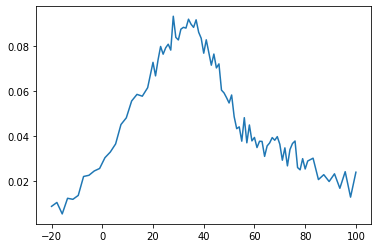

In [ ]:
plt.plot(t, signal_noise)

[0.00530512 0.00444689 0.00617282 0.00790074 0.00752595]
0.006270303709371922
0.001303907887468731


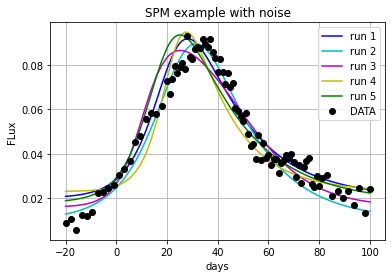

In [ ]:

run1= "0.020+((((_sig_(0.167*(x[0]-22.32))))|_div_|((_exp_((x[0]-60.61)|_div_|21.92))))|_div_|(44.39))"
run2= "0.010+(((_sig_(0.135*(x[0]-27.57))))|_div_|(((_exp_((x[0]-68.53)|_div_|19.80)))*(51.34)))"
run3= "0.016+(((_sig_(0.185*(x[0]-10.81))))|_div_|((10.96)+((_exp_((x[0]-13.36)|_div_|14.30)))))"
#run4= "0.021+(((_sig_(0.267*(x[0]-22.16))))|_div_|((x[0])*((_exp_((x[0]-74.93)|_div_|50.52)))))"
run4= "0.023+((((_sig_(0.2315*(x[0]-22.93))))|_div_|((_exp_((x[0]-61.56)|_div_|16.90))))|_div_|(77.54))"
#run5= "0.020+(((_sig_(0.226*(x[0]-25.66))))|_div_|((x[0])*((_exp_((x[0]-79.88)|_div_|44.24)))))"
run5="0.018+(((_sig_(0.173*(x[0]-18.55))))|_div_|((58.62)*((_exp_((x[0]-67.10)|_div_|23.76)))))"
g1=lambda t: str_to_value(t,run1)
g2=lambda t: str_to_value(t,run2)
g3=lambda t: str_to_value(t,run3)
g4=lambda t: str_to_value(t,run4)
g5=lambda t: str_to_value(t,run5)

plotResults(t,signal_noise,g1(t), g2(t), g3(t), g4(t), g5(t), title="SPM example with noise")


rmse_=CalcularRMS(t, signal_,g1(t), g2(t), g3(t), g4(t), g5(t))
print(rmse_)
print(np.mean(rmse_))
print(np.std(rmse_))

[0.0041825  0.00610404 0.0054501  0.00528542 0.00647164]
0.005498738294721915
0.0007865477791404223


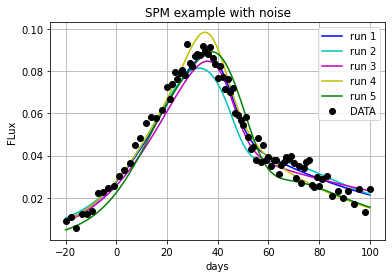

In [ ]:
run1= "(0.135*(1-0.019*(x[0]-45.6)|_div_|41.87)|_div_|(1+_exp_((21.7-x[0])|_div_|15.65)))*(1-_sig_(0.2*(x[0]-(02.01+44.0))))+(_sig_(0.2*(x[0]-(16.83+35.2))))*(0.097*(1-0.092)*_exp_((06.00+40.2-x[0])|_div_|52.45)|_div_|(1+_exp_((28.6-x[0])|_div_|97.85)))"
run2= "(0.003-(0.360*(x[0]-51.0)|_div_|32.24)|_div_|(1+_exp_((39.1-x[0])|_div_|12.68)))*(1-_sig_(0.2*(x[0]-(01.99+45.9))))+(_sig_(0.2*(x[0]-(07.49+34.3))))*(0.197*(1-0.826)*_exp_((46.81+29.9-x[0])|_div_|50.70)|_div_|(1+_exp_((34.3-x[0])|_div_|09.12)))"
run3= "(0.137*(1-0.073*(x[0]-49.9)|_div_|92.61)|_div_|(1+_exp_((24.1-x[0])|_div_|15.96)))*(1-_sig_(0.2*(x[0]-(24.05+22.1))))+(_sig_(0.2*(x[0]-(08.04+44.0))))*(0.063*(1-0.356)*_exp_((62.46+24.6-x[0])|_div_|69.32)|_div_|(1+_exp_((26.0-x[0])|_div_|91.57)))"


run4= "(0.0526*(1-0.9285*(x[0]-53.9)|_div_|17.57)|_div_|(1+_exp_((24.5-x[0])|_div_|13.36)))*(1-_sig_(0.2*(x[0]-(22.70+20.0))))+(_sig_(0.2*(x[0]-(09.64+23.0))))*(0.136*(1-0.336)*_exp_((24.11+21.5-x[0])|_div_|34.74)|_div_|(1+_exp_((31.8-x[0])|_div_|48.66)))"
run5= "(0.065*(1-0.8999*(x[0]-39.9)|_div_|15.04)|_div_|(1+_exp_((22.5-x[0])|_div_|10.33)))*(1-_sig_(0.2*(x[0]-(35.00+22.9))))+(_sig_(0.2*(x[0]-(02.50+32.8))))*((0.279*(1-0.804)*_exp_((23.68+30.8-x[0])|_div_|36.85))|_div_|(1+_exp_((32.7-x[0])|_div_|17.40)))"
g1=lambda t: str_to_value(t,run1)
g2=lambda t: str_to_value(t,run2)
g3=lambda t: str_to_value(t,run3)
g4=lambda t: str_to_value(t,run4)
g5=lambda t: str_to_value(t,run5)

plotResults(t,signal_noise,g1(t), g2(t), g3(t), g4(t), g5(t), title="SPM example with noise")


rmse_1=CalcularRMS(t,signal_noise,g1(t), g2(t), g3(t), g4(t), g5(t))
print(rmse_1)

print(np.mean(rmse_1))
print(np.std(rmse_1))

In [ ]:
from scipy import stats
anova = stats.f_oneway(rmse_,rmse_1)
anova

F_onewayResult(statistic=1.026918524708315, pvalue=0.34054797683436594)

## Banda Roja

In [ ]:
base='alerceZTFv7.1_4spm-mcmc_33888_red.txt'
t,signal_red33888 =LeerData(base)
t=np.array(t)

[0.02486614 0.02497603 0.01906537 0.0140568  0.02217401]
0.02102767135567157
0.004100759429174495


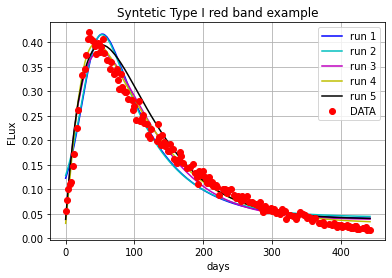

In [ ]:
#run1= "0.043+(((_sig_(0.073*(x[0]-33.21))))|_div_|((_exp_((x[0]-00.07)|_div_|68.76))))"
run1="0.039+(((_sig_(0.071*(x[0]-33.71))))|_div_|((_exp_((x[0]-00.04)|_div_|70.93))))"
run2= "0.043+(((_sig_(0.071*(x[0]-33.41))))|_div_|((_exp_((x[0]-00.00)|_div_|69.33))))"
run3= "0.038+((x[0])|_div_|(((_exp_((x[0]-22.11)|_div_|49.90)))*(83.30)))"
run4="0.030+(((_sig_(0.074*(x[0]-03.00))))-((_sig_(0.013*(x[0]-17.27)))))"
run5="0.039+((((x[0])|_div_|(97.43))*(01.20))|_div_|((_exp_((x[0]-21.56)|_div_|51.83))))"
g1=lambda t: str_to_value(t,run1)
g2=lambda t: str_to_value(t,run2)
g3=lambda t: str_to_value(t,run3)
g4=lambda t: str_to_value(t,run4)
g5=lambda t: str_to_value(t,run5)

plotResultsRed(t,signal_red33888,g1(t), g2(t), g3(t), g4(t), g5(t), title="Syntetic Type I red band example")


rmse_=CalcularRMS(t, signal_red33888,g1(t), g2(t), g3(t), g4(t), g5(t))
print(rmse_)
print(np.mean(rmse_))
print(np.std(rmse_))

[0.01674721 0.02083053 0.01854989 0.02013308 0.01929698]
0.019111539101762928
0.0014098471502082173


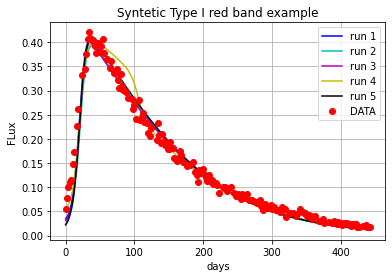

In [ ]:
#run1= "0.043+(((_sig_(0.073*(x[0]-33.21))))|_div_|((_exp_((x[0]-00.07)|_div_|68.76))))"
run1= "(0.0543*(1-0.434*(x[0]-55.4)|_div_|59.70)|_div_|(1+_exp_((56.1-x[0])|_div_|92.90)))*(1-_sig_(0.2*(x[0]-(17.70+21.3))))+(_sig_(0.2*(x[0]-(00.38+20.0))))*(0.636*(1-0.033)*_exp_((13.20+43.4-x[0])|_div_|99.70)|_div_|(1+_exp_((21.6-x[0])|_div_|97.11)))"
run2= "(0.0959*(1-0.617*(x[0]-44.9)|_div_|43.00)|_div_|(1+_exp_((24.5-x[0])|_div_|11.69)))*(1-_sig_(0.2*(x[0]-(05.81+21.9))))+(_sig_(0.2*(x[0]-(02.70+20.0))))*(0.892*(1-0.578)*_exp_((80.67+29.8-x[0])|_div_|96.27)|_div_|(1+_exp_((37.6-x[0])|_div_|93.25)))"
run3= "(0.0523*(1-0.834*(x[0]-50.8)|_div_|72.91)|_div_|(1+_exp_((39.9-x[0])|_div_|45.21)))*(1-_sig_(0.2*(x[0]-(02.75+31.4))))+(_sig_(0.2*(x[0]-(00.14+20.9))))*(0.708*(1-0.039)*_exp_((26.74+21.9-x[0])|_div_|99.34)|_div_|(1+_exp_((27.6-x[0])|_div_|97.62)))"

run4="(0.119*(1-0.045*(x[0]-45.3)|_div_|23.46)|_div_|(1+_exp_((29.3-x[0])|_div_|59.20)))*(1-_sig_(0.2*(x[0]-(75.67+30.1))))+(_sig_(0.2*(x[0]-(00.55+20.2))))*(0.657*(1-0.209)*_exp_((40.65+36.4-x[0])|_div_|99.29)|_div_|(1+_exp_((57.4-x[0])|_div_|95.51)))"
run5="(0.108*(1-0.820*(x[0]-30.2)|_div_|34.58)|_div_|(1+_exp_((34.0-x[0])|_div_|14.30)))*(1-_sig_(0.2*(x[0]-(05.54+20.2))))+(_sig_(0.2*(x[0]-(00.24+21.1))))*(0.688*(1-0.330)*_exp_((34.37+53.9-x[0])|_div_|98.22)|_div_|(1+_exp_((22.2-x[0])|_div_|96.23)))"
g1=lambda t: str_to_value(t,run1)
g2=lambda t: str_to_value(t,run2)
g3=lambda t: str_to_value(t,run3)
g4=lambda t: str_to_value(t,run4)
g5=lambda t: str_to_value(t,run5)

plotResultsRed(t,signal_red33888,g1(t), g2(t), g3(t), g4(t), g5(t), title="Syntetic Type I red band example")


rmse_1=CalcularRMS(t, signal_red33888,g1(t), g2(t), g3(t), g4(t), g5(t))
print(rmse_1)
print(np.mean(rmse_1))
print(np.std(rmse_1))

In [ ]:
from scipy import stats
anova = stats.f_oneway(rmse_,rmse_1)
anova

F_onewayResult(statistic=0.7810216865856566, pvalue=0.4026055640420502)

## Banda VErde

In [ ]:
base='alerceZTFv7.1_4spm-mcmc_33888_green.txt'
t,signal_green33888 =LeerData(base)
t=np.array(t)

[0.01910654 0.01747296 0.01991793 0.01929374 0.01155494]
0.017469219994175066
0.0030654393196952005


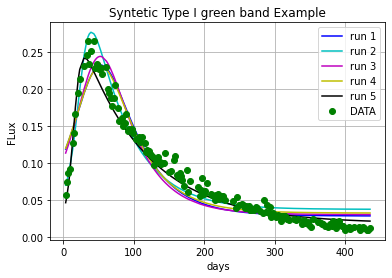

In [ ]:
#run1= "0.038+(((_sig_(0.073*(x[0]-39.46))))|_div_|((_exp_((x[0]-04.20)|_div_|38.89))))"
run1="0.028+(((_sig_(0.054*(x[0]-44.74))))|_div_|((_exp_((x[0]-00.14)|_div_|48.35))))"
run2="0.037+(((_sig_(0.123*(x[0]-25.70))))|_div_|(((_exp_((x[0]-05.73)|_div_|48.86)))+((_exp_((x[0]-10.19)|_div_|69.30)))))"
run3="0.030+(((_sig_(0.060*(x[0]-43.93))))|_div_|((_exp_((x[0]-04.71)|_div_|44.57))))"
run4= "0.032+(((_sig_(0.055*(x[0]-44.61))))|_div_|((_exp_((x[0]-00.05)|_div_|47.09))))"
run5= "0.018+(((_sig_(0.191*(x[0]-15.65))))|_div_|(((_exp_((x[0]-69.87)|_div_|93.19)))*(06.43)))"

g1=lambda t: str_to_value(t,run1)
g2=lambda t: str_to_value(t,run2)
g3=lambda t: str_to_value(t,run3)
g4=lambda t: str_to_value(t,run4)
g5=lambda t: str_to_value(t,run5)

plotResultsGreen(t,signal_green33888,g1(t), g2(t), g3(t), g4(t), g5(t), title="Syntetic Type I green band Example")


rmse_=CalcularRMS(t,signal_green33888,g1(t), g2(t), g3(t), g4(t), g5(t))
print(rmse_)
print(np.mean(rmse_))
print(np.std(rmse_))

[0.01124538 0.01181526 0.01095611 0.01637288 0.01412521]
0.012902967655600343
0.0020618025831636144


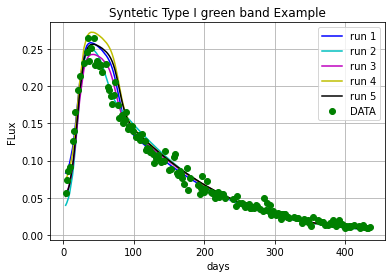

In [ ]:
run1= "(0.137*(1-0.018*(x[0]-52.6)|_div_|03.70)|_div_|(1+_exp_((23.1-x[0])|_div_|99.42)))*(1-_sig_(0.2*(x[0]-(24.43+53.7))))+(_sig_(0.2*(x[0]-(00.09+20.3))))*(0.719*(1-0.533)*_exp_((22.90+33.0-x[0])|_div_|98.86)|_div_|(1+_exp_((53.4-x[0])|_div_|95.10)))"
run2= "(0.068*(1-0.151*(x[0]-56.8)|_div_|51.81)|_div_|(1+_exp_((27.2-x[0])|_div_|60.53)))*(1-_sig_(0.2*(x[0]-(18.43+42.1))))+(_sig_(0.2*(x[0]-(00.50+20.0))))*(0.344*(1-0.186)*_exp_((32.22+44.8-x[0])|_div_|96.84)|_div_|(1+_exp_((29.7-x[0])|_div_|98.17)))"
run3= "(0.103*(1-0.123*(x[0]-44.2)|_div_|64.46)|_div_|(1+_exp_((20.6-x[0])|_div_|65.22)))*(1-_sig_(0.2*(x[0]-(30.89+43.3))))+(_sig_(0.2*(x[0]-(00.15+20.4))))*(0.940*(1-0.736)*_exp_((59.36+28.5-x[0])|_div_|99.74)|_div_|(1+_exp_((52.4-x[0])|_div_|92.22)))"
run4= "(0.175*(1-0.229*(x[0]-20.4)|_div_|87.81)|_div_|(1+_exp_((52.3-x[0])|_div_|95.55)))*(1-_sig_(0.2*(x[0]-(36.02+42.8))))+(_sig_(0.2*(x[0]-(00.28+20.8))))*(0.378*(1-0.395)*_exp_((46.85+53.6-x[0])|_div_|97.06)|_div_|(1+_exp_((52.4-x[0])|_div_|97.37)))"
run5= "(0.104*(1-0.203*(x[0]-31.1)|_div_|93.63)|_div_|(1+_exp_((20.0-x[0])|_div_|41.86)))*(1-_sig_(0.2*(x[0]-(30.32+48.9))))+(_sig_(0.2*(x[0]-(00.39+20.0))))*(0.873*(1-0.577)*_exp_((28.78+24.3-x[0])|_div_|98.36)|_div_|(1+_exp_((52.8-x[0])|_div_|98.97)))"

g1=lambda t: str_to_value(t,run1)
g2=lambda t: str_to_value(t,run2)
g3=lambda t: str_to_value(t,run3)
g4=lambda t: str_to_value(t,run4)
g5=lambda t: str_to_value(t,run5)

plotResultsGreen(t,signal_green33888,g1(t), g2(t), g3(t), g4(t), g5(t), title="Syntetic Type I green band Example")


rmse_=CalcularRMS(t,signal_green33888,g1(t), g2(t), g3(t), g4(t), g5(t))
print(rmse_)
print(np.mean(rmse_))
print(np.std(rmse_))

In [ ]:
from scipy import stats
anova = stats.f_oneway(rmse_,rmse_1)
anova

F_onewayResult(statistic=0.9476714443731338, pvalue=0.3588242359932734)

## Bana Roja2

In [ ]:
base='alerceZTFv7.1_4spm-mcmc_352_red.txt'
t,signal_red352 =LeerData(base)
t=np.array(t)

[0.02937254 0.01608204 0.01611062 0.04646398 0.01570342]
[0.02937254 0.01608204 0.01611062 0.04646398 0.01570342]
0.024746519565026912
0.012037256524910396


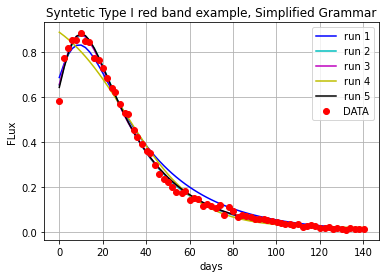

In [ ]:
run1= "0.002+(((_sig_(0.148*(x[0]-00.71))))|_div_|((_exp_((x[0]-11.18)|_div_|30.24))))"
run2= "0.010+(((_sig_(0.157*(x[0]-03.63))))|_div_|((_exp_((x[0]-14.11)|_div_|24.38))))"
run3= "0.003+(((_sig_(0.168*(x[0]-02.54))))|_div_|((_exp_((x[0]-13.06)|_div_|25.98))))"
run4="0.010+((01.01)-((_sig_(0.061*(x[0]-30.99)))))"
run5="0.007+(((_sig_(0.169*(x[0]-02.99))))|_div_|((_exp_((x[0]-13.39)|_div_|25.46))))"
g1=lambda t: str_to_value(t,run1)
g2=lambda t: str_to_value(t,run2)
g3=lambda t: str_to_value(t,run3)
g4=lambda t: str_to_value(t,run4)
g5=lambda t: str_to_value(t,run5)

plotResultsRed(t,signal_red352,g1(t), g2(t), g3(t), g4(t), g5(t), title="Syntetic Type I red band example, Simplified Grammar")


rmse_=CalcularRMS(t,signal_red352,g1(t), g2(t), g3(t), g4(t), g5(t))
print(rmse_)
print(rmse_)
print(np.mean(rmse_))
print(np.std(rmse_))

[0.07608489 0.08340216 0.03748551 0.06604788 0.0836078 ]
[0.07608489 0.08340216 0.03748551 0.06604788 0.0836078 ]
0.06932564675537554
0.017160148305212244


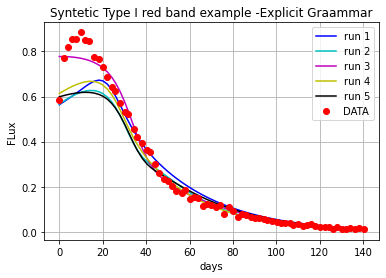

In [ ]:
run1="(0.665*(1-0.983*(x[0]-44.7)|_div_|22.85)|_div_|(1+_exp_((28.2-x[0])|_div_|30.65)))*(1-_sig_(0.2*(x[0]-(01.49+21.9))))+(_sig_(0.2*(x[0]-(00.90+20.4))))*(0.541*(1-0.858)*_exp_((64.05+33.6-x[0])|_div_|26.72)|_div_|(1+_exp_((31.1-x[0])|_div_|55.70)))"
run2="(0.660*(1-0.579*(x[0]-43.6)|_div_|10.82)|_div_|(1+_exp_((27.9-x[0])|_div_|26.34)))*(1-_sig_(0.2*(x[0]-(01.61+31.8))))+(_sig_(0.2*(x[0]-(08.72+29.7))))*(0.412*(1-0.453)*_exp_((44.13+24.3-x[0])|_div_|24.02)|_div_|(1+_exp_((40.2-x[0])|_div_|96.36)))"
run3="(0.973*(1-0.858*(x[0]-48.9)|_div_|44.00)|_div_|(1+_exp_((21.1-x[0])|_div_|57.53)))*(1-_sig_(0.2*(x[0]-(09.28+25.9))))+(_sig_(0.2*(x[0]-(16.72+21.3))))*(0.812*(1-0.668)*_exp_((25.13+35.9-x[0])|_div_|25.23)|_div_|(1+_exp_((51.0-x[0])|_div_|28.55)))"
run4= "(0.736*(1-0.783*(x[0]-53.2)|_div_|28.19)|_div_|(1+_exp_((21.5-x[0])|_div_|31.67)))*(1-_sig_(0.2*(x[0]-(10.54+20.0))))+(_sig_(0.2*(x[0]-(00.35+33.6))))*(0.451*(1-0.478)*_exp_((44.61+22.0-x[0])|_div_|25.17)|_div_|(1+_exp_((49.5-x[0])|_div_|82.25)))"
run5= "(0.680*(1-0.476*(x[0]-58.4)|_div_|17.80)|_div_|(1+_exp_((27.8-x[0])|_div_|43.08)))*(1-_sig_(0.2*(x[0]-(10.09+23.9))))+(_sig_(0.2*(x[0]-(08.63+30.5))))*(0.433*(1-0.216)*_exp_((27.35+32.6-x[0])|_div_|25.59)|_div_|(1+_exp_((53.5-x[0])|_div_|44.92)))"

g1=lambda t: str_to_value(t,run1)
g2=lambda t: str_to_value(t,run2)
g3=lambda t: str_to_value(t,run3)
g4=lambda t: str_to_value(t,run4)
g5=lambda t: str_to_value(t,run5)
plotResultsRed(t,signal_red352,g1(t), g2(t), g3(t), g4(t), g5(t), title="Syntetic Type I red band example -Explicit Graammar")


rmse_=CalcularRMS(t,signal_red352,g1(t), g2(t), g3(t), g4(t), g5(t))
print(rmse_)
print(rmse_)
print(np.mean(rmse_))
print(np.std(rmse_))

In [ ]:
from scipy import stats
anova = stats.f_oneway(rmse_,rmse_1)
anova

F_onewayResult(statistic=13.460160853768217, pvalue=0.006320332078245895)

## banda Verde 2

In [ ]:
base='alerceZTFv7.1_4spm-mcmc_352_green.txt'
t,signal_green352=LeerData(base)
t=np.array(t)

[0.0320686  0.03204894 0.02539087 0.02952057 0.03186214]
0.03017822472556665
0.0025791454884925443


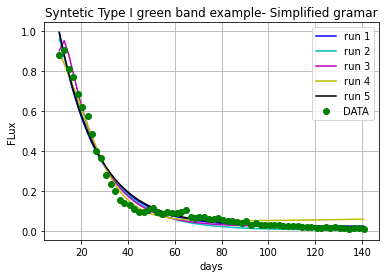

In [ ]:
run1="0.023+((x[0])|_div_|((x[0])*((_exp_((x[0]-09.95)|_div_|16.63)))))"
run2="0.004+((43.58)|_div_|(((((_exp_((x[0]-61.89)|_div_|17.99)))*(17.90))*(54.38))-(x[0])))"
run3="0.021+((((_exp_((x[0]-09.17)|_div_|53.57)))|_div_|((_exp_((x[0]-12.03)|_div_|11.37))))*((_sig_(0.635*(x[0]-08.80)))))"
run4= "0.022+(((_exp_(((_exp_((x[0]-19.57)|_div_|74.69)))|_div_|(x[0]))))-((_sig_(0.119*(x[0]-21.34)))))"
run5= "0.043+((((x[0])|_div_|((_exp_((x[0]-10.27)|_div_|16.48))))-((_exp_((x[0]-71.23)|_div_|56.83))))|_div_|(x[0]))"

g1=lambda t: str_to_value(t,run1)
g2=lambda t: str_to_value(t,run2)
g3=lambda t: str_to_value(t,run3)
g4=lambda t: str_to_value(t,run4)
g5=lambda t: str_to_value(t,run5)

plotResultsGreen(t,signal_green352,g1(t), g2(t), g3(t), g4(t), g5(t), title="Syntetic Type I green band example- Simplified gramar")


rmse_=CalcularRMS(t,signal_green352,g1(t), g2(t), g3(t), g4(t), g5(t))
print(rmse_)
print(np.mean(rmse_))
print(np.std(rmse_))

[0.03597916 0.05646821 0.04466004 0.03198021 0.07829494]
0.04947651422956232
0.016678628959232455


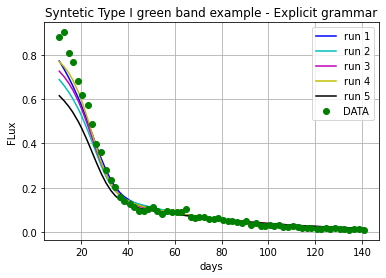

In [ ]:

run1="(0.773*(1-0.657*(x[0]-31.0)|_div_|11.11)|_div_|(1+_exp_((21.6-x[0])|_div_|68.60)))*(1-_sig_(0.2*(x[0]-(04.75+23.9))))+(_sig_(0.2*(x[0]-(01.20+26.8))))*(0.273*(1-0.588)*_exp_((23.03+51.3-x[0])|_div_|33.02)|_div_|(1+_exp_((59.6-x[0])|_div_|77.95)))"
run2="(0.654*(1-0.834*(x[0]-41.2)|_div_|18.62)|_div_|(1+_exp_((27.8-x[0])|_div_|95.46)))*(1-_sig_(0.2*(x[0]-(07.71+20.6))))+(_sig_(0.2*(x[0]-(10.02+24.1))))*(0.738*(1-0.895)*_exp_((31.97+54.7-x[0])|_div_|32.71)|_div_|(1+_exp_((57.7-x[0])|_div_|83.40)))"
run3="(0.616*(1-0.953*(x[0]-58.8)|_div_|23.44)|_div_|(1+_exp_((44.3-x[0])|_div_|96.84)))*(1-_sig_(0.2*(x[0]-(04.30+21.5))))+(_sig_(0.2*(x[0]-(05.28+22.1))))*(0.371*(1-0.668)*_exp_((35.76+30.5-x[0])|_div_|38.80)|_div_|(1+_exp_((42.8-x[0])|_div_|54.33)))"
run4= "(0.676*(1-0.841*(x[0]-59.0)|_div_|21.69)|_div_|(1+_exp_((33.0-x[0])|_div_|63.55)))*(1-_sig_(0.2*(x[0]-(02.86+23.0))))+(_sig_(0.2*(x[0]-(01.20+31.0))))*(0.553*(1-0.674)*_exp_((18.88+33.5-x[0])|_div_|38.05)|_div_|(1+_exp_((37.3-x[0])|_div_|71.83)))"
run5= "(0.562*(1-0.881*(x[0]-47.2)|_div_|21.62)|_div_|(1+_exp_((27.8-x[0])|_div_|92.30)))*(1-_sig_(0.2*(x[0]-(01.97+25.1))))+(_sig_(0.2*(x[0]-(03.68+27.5))))*(0.646*(1-0.838)*_exp_((14.47+57.4-x[0])|_div_|41.91)|_div_|(1+_exp_((38.2-x[0])|_div_|69.24)))"

#run1="(0.773*(1-0.857*(x[0]-31.0)|_div_|11.11)|_div_|(1+_exp_((21.6-x[0])|_div_|68.60)))*(1-_sig_(0.2*(x[0]-(04.75+23.9))))+(_sig_(0.2*(x[0]-(01.20+26.8))))*(0.273*(1-0.588)*_exp_((23.03+51.3-x[0])|_div_|33.02)|_div_|(1+_exp_((59.6-x[0])|_div_|77.95)))"
#run2="(0.754*(1-0.834*(x[0]-41.2)|_div_|18.62)|_div_|(1+_exp_((27.8-x[0])|_div_|95.46)))*(1-_sig_(0.2*(x[0]-(07.71+20.6))))+(_sig_(0.2*(x[0]-(10.02+24.1))))*(0.738*(1-0.895)*_exp_((31.97+54.7-x[0])|_div_|32.71)|_div_|(1+_exp_((57.7-x[0])|_div_|83.40)))"
#run3="(0.656*(1-0.803*(x[0]-58.8)|_div_|23.44)|_div_|(1+_exp_((44.3-x[0])|_div_|96.84)))*(1-_sig_(0.2*(x[0]-(04.30+21.5))))+(_sig_(0.2*(x[0]-(05.28+22.1))))*(0.371*(1-0.668)*_exp_((35.76+30.5-x[0])|_div_|38.80)|_div_|(1+_exp_((42.8-x[0])|_div_|54.33)))"
#run4= "(0.676*(1-0.841*(x[0]-59.0)|_div_|21.69)|_div_|(1+_exp_((33.0-x[0])|_div_|63.55)))*(1-_sig_(0.2*(x[0]-(02.86+23.0))))+(_sig_(0.2*(x[0]-(01.20+31.0))))*(0.553*(1-0.674)*_exp_((18.88+33.5-x[0])|_div_|38.05)|_div_|(1+_exp_((37.3-x[0])|_div_|71.83)))"
#run5= "(0.762*(1-0.991*(x[0]-47.2)|_div_|21.62)|_div_|(1+_exp_((27.8-x[0])|_div_|92.30)))*(1-_sig_(0.2*(x[0]-(01.97+25.1))))+(_sig_(0.2*(x[0]-(03.68+27.5))))*(0.646*(1-0.838)*_exp_((14.47+57.4-x[0])|_div_|41.91)|_div_|(1+_exp_((38.2-x[0])|_div_|69.24)))"

g1=lambda t: str_to_value(t,run1)
g2=lambda t: str_to_value(t,run2)
g3=lambda t: str_to_value(t,run3)
g4=lambda t: str_to_value(t,run4)
g5=lambda t: str_to_value(t,run5)

plotResultsGreen(t,signal_green352,g1(t), g2(t), g3(t), g4(t), g5(t), title="Syntetic Type I green band example - Explicit grammar")


rmse_1=CalcularRMS(t,signal_green352,g1(t), g2(t), g3(t), g4(t), g5(t))
print(rmse_1)
print(np.mean(rmse_1))
print(np.std(rmse_1))

In [ ]:
from scipy import stats
anova = stats.f_oneway(rmse_,rmse_1)
anova

F_onewayResult(statistic=5.230147609175188, pvalue=0.051509369527356914)